<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Random-Numbers" data-toc-modified-id="Random-Numbers-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Random Numbers</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Simulation</a></span></li><li><span><a href="#References" data-toc-modified-id="References-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Random numbers

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import math
import numpy as np
import numpy.random as npr  
from pylab import plt, mpl

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

# Random Numbers
<hr style = "border:2px solid black" ></hr>

In [3]:
npr.seed(100)  
np.set_printoptions(precision=4) 

In [4]:
npr.rand(10)  

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [5]:
npr.rand(5, 5)  

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365]])

In [6]:
a = 5.  
b = 10.  
npr.rand(10) * (b - a) + a  

array([9.4521, 9.9046, 5.2997, 9.4527, 7.8845, 8.7124, 8.1509, 7.9092,
       5.1022, 6.0501])

In [7]:
npr.rand(5, 5) * (b - a) + a  

array([[7.7234, 8.8456, 6.2535, 6.4295, 9.262 ],
       [9.875 , 9.4243, 6.7975, 7.9943, 6.774 ],
       [6.701 , 5.8904, 6.1885, 5.2243, 7.5272],
       [6.8813, 7.964 , 8.1497, 5.713 , 9.6692],
       [9.7319, 8.0115, 6.9388, 6.8159, 6.0217]])

In [8]:
sample_size = 500
rn1 = npr.rand(sample_size, 3)  
rn2 = npr.randint(0, 10, sample_size)  
rn3 = npr.sample(size=sample_size)  
a = [0, 25, 50, 75, 100]  
rn4 = npr.choice(a, size=sample_size) 

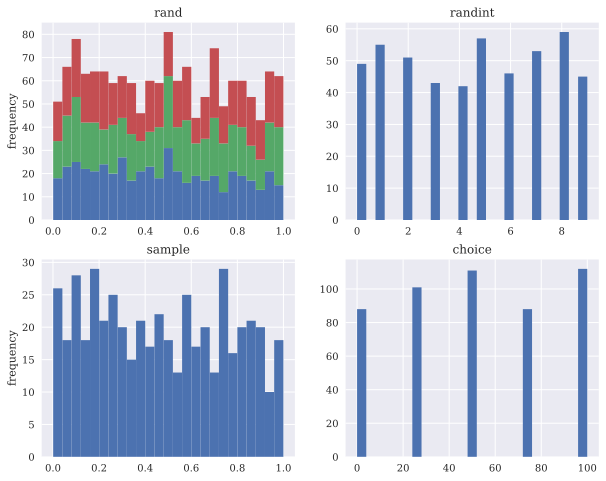

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25, stacked=True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('choice');
# plt.savefig('../../images/ch12/stoch_01.png');

In [10]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)  
rn2 = npr.normal(100, 20, sample_size)  
rn3 = npr.chisquare(df=0.5, size=sample_size)  
rn4 = npr.poisson(lam=1.0, size=sample_size)  

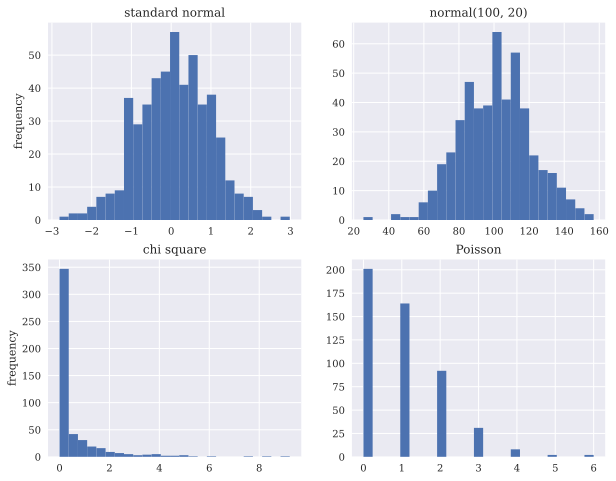

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                             figsize=(10, 8))
ax1.hist(rn1, bins=25)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson');
# plt.savefig('../../images/ch12/stoch_02.png');

# Simulation
<hr style = "border:2px solid black" ></hr>

In [12]:
S0 = 100  
r = 0.05  
sigma = 0.25  
T = 2.0  
I = 10000  
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
        sigma * math.sqrt(T) * npr.standard_normal(I))  

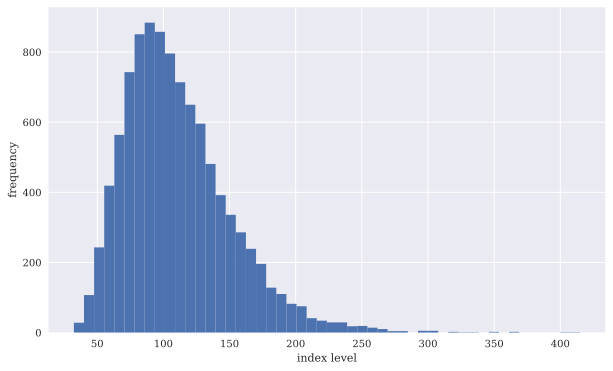

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_03.png');

In [14]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * math.sqrt(T), size=I)  

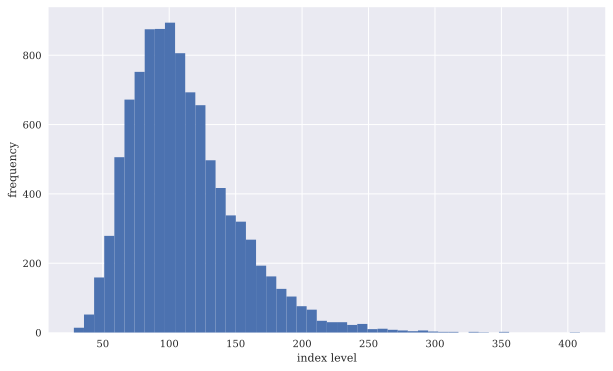

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');
# plt.savefig('../../images/ch12/stoch_04.png');

In [16]:
import scipy.stats as scs

In [17]:
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2: ndarray objects
        results objects from simulation
    '''
    sta1 = scs.describe(a1)  
    sta2 = scs.describe(a2)  
    print('%14s %14s %14s' % 
        ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))

In [18]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         32.327         28.230
           max        414.825        409.110
          mean        110.730        110.431
           std         40.300         39.878
          skew          1.122          1.115
      kurtosis          2.438          2.217


# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- https://github.com/yhilpisch/py4fi2nd/blob/master/code/ch12/12_stochastics.ipynb
- Hilpisch, Yves. Python for finance: mastering data-driven finance. O'Reilly Media, 2018.
    
</font>
</div>